<a href="https://colab.research.google.com/github/avantipova/ml2022/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Основанная на плотности пространственная кластеризация для приложений с шумами (англ. Density-based spatial clustering of applications with noise, DBSCAN)** — это алгоритм кластеризации данных, который предложили Маритин Эстер, Ганс-Петер Кригель, Ёрг Сандер и Сяовэй Су в 1996 году. Это алгоритм кластеризации, основанной на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены, помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью. 

Задание - реализовать DBScan на плоскости с тремя гауссовыми ядрами

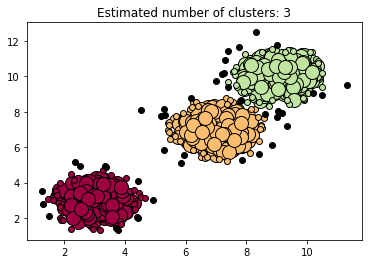

Estimated no. of clusters: 3
Estimated no. of noise points: 42


In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Конфигурационные переменные
num_samples_total = 1000
cluster_centers = [(3,3), (7,7), (9,10)]
num_classes = len(cluster_centers)
epsilon = 0.5
min_samples = 15

# Создание данных
X, y = make_blobs(n_samples = num_samples_total, centers=cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.7)

# DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)

# Отображение данных
no_clusters = len(np.unique(db.labels_)) - 1
no_noise = np.sum(np.array(db.labels_) == -1, axis=0)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = db.labels_ == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % no_clusters)
plt.show()

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)